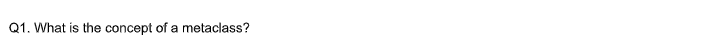

A metaclass in Python is a class of a class that defines how a class behaves. A class is itself an instance of a metaclass. A class in Python defines how the instance of the class will behave. In order to understand metaclasses well, one needs to have prior experience working with Python classes.



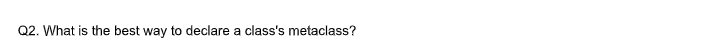

- New-style classes unify the concepts of class and type. If `obj` is an instance of a `new-style class`, `type(obj)` is the same as `obj.__class__:`

In [1]:
class Foo:
    pass
obj = Foo()

obj.__class__ is type(obj)

In [2]:
obj.__class__

In [3]:
type(obj)

- In Python 3, all classes are new-style classes. Thus, in Python 3 it is reasonable to refer to an object’s type and its class interchangeably.
- Remember that, in Python, everything is an object. Classes are objects as well. As a result, a class must have a type. What is the type of a class?

In [4]:
class Foo:
    pass
    
X = Foo()

In [5]:
type(X)

In [6]:
type(Foo)

The type of x is class Foo, as you would expect. But the type of Foo, the class itself, is type. In general, the type of any new-style class is type.

In [7]:
for t in int, float, dict, list, tuple:
     print(type(t))

In [8]:
article = 'metaclasses'
article.__class__

In Python, we can customize the class creation process by passing the metaclass keyword in the class definition. This can also be done by inheriting a class that has already passed in this keyword.

In [9]:
class MyMeta(type):
    pass

class MyClass(metaclass=MyMeta):
    pass

class MySubclass(MyClass):
    pass

In [10]:
print(type(MyMeta))
print(type(MyClass))
print(type(MySubclass))

Metaclasses can also be defined in one of the two ways shown below. We'll explain the difference between them below.

In [11]:
class MetaOne(type):
    def __new__(cls, name, bases, dict):
        pass

class MetaTwo(type):
    def __init__(self, name, bases, dict):
        pass

`__new__` is used when one wants to define dict or bases tuples before the class is created. The return value of `__new__` is usually an instance of `cls. __new__` allows subclasses of immutable types to customize instance creation. It can be overridden in custom metaclasses to customize class creation. `__init__` is usually called after the object has been created so as to initialize it.

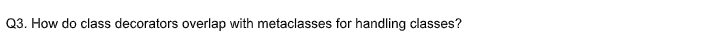

- Decorators are much, much simpler and more limited -- and therefore should be preferred whenever the desired effect can be achieved with either a metaclass or a class decorator.
- Anything you can do with a class decorator, you can of course do with a custom metaclass (just apply the functionality of the "decorator function", i.e., the one that takes a class object and modifies it, in the course of the metaclass's `__new__` or `__init__` that make the class object!-).
- One point is that the use of metaclass affects its children while the decorator affects only the current class.

In [12]:
def deco4cls(cls):
    cls.func1 = lambda self: 2
    return cls


@deco4cls
class Cls1:
    pass


class Cls1_1(Cls1):
    def func1(self):
        return 3


obj1_1 = Cls1_1()
print(obj1_1.func1())  # 3

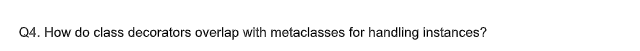

In [13]:
def deco4cls(cls):
    cls.func1 = lambda self: 2
    return cls


@deco4cls
class Cls1:
    pass


class Cls1_1(Cls1):
    def func1(self):
        return 3


obj1_1 = Cls1_1()
print(obj1_1.func1())  # 3